# Разведывательный анализ данных.
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, необходимо провести разведывательный анализ данных и составить отчёт по его результатам.


Датасет находится здесь.https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-12+11MAR2020+type@asset+block/stud_math.csv



# Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)
20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике


# Задачи проекта
- Провести первичную обработку данных.
- Написать функции, которые можно применять к столбцам определённого типа.
- Посмотреть на распределение признака для числовых переменных, устранить выбросы.
- Оценить количество уникальных значений для номинативных переменных.
- По необходимости преобразовать данные
- Провести корреляционный анализ количественных переменных
- Отобрать не коррелирующие переменные.
- Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
- Сформулировать выводы относительно качества данных и тех переменных, которые будут использованы в дальнейшем построении модели.

In [36]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

stud = pd.read_csv(r'data\stud\stud_math.xls')
stud

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     NaN       A   4.0   4.0   at_home   teacher   
1       GP   F   17       U     GT3     NaN   1.0   1.0   at_home     other   
2       GP   F   15       U     LE3       T   1.0   1.0   at_home     other   
3       GP   F   15       U     GT3       T   4.0   2.0    health       NaN   
4       GP   F   16       U     GT3       T   3.0   3.0     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A   2.0   2.0  services  services   
391     MS   M   17       U     LE3       T   3.0   1.0  services  services   
392     MS   M   21       R     GT3       T   1.0   1.0     other     other   
393     MS   M   18       R     LE3       T   3.0   2.0  services     other   
394     MS   M   19       U     LE3       T   1.0   1.0     other   at_home   

     ... studytime, granular higher  internet  romantic  famrel freetime  \
0    ...                -6.0    yes       NaN        no     4.0      3.0   
1    ...                -6.0    yes       yes        no     5.0      3.0   
2    ...                -6.0    yes       yes       NaN     4.0      3.0   
3    ...                -9.0    yes       yes       yes     3.0      2.0   
4    ...                -6.0    yes        no        no     4.0      3.0   
..   ...                 ...    ...       ...       ...     ...      ...   
390  ...                -6.0    yes        no        no     5.0      5.0   
391  ...                -3.0    yes       yes        no     2.0      4.0   
392  ...                -3.0    NaN        no        no     5.0      5.0   
393  ...                -3.0    yes       yes        no     4.0      4.0   
394  ...                -3.0    yes       yes        no     3.0      2.0   

    goout health absences score  
0     4.0    3.0      6.0  30.0  
1     3.0    3.0      4.0  30.0  
2     2.0    3.0     10.0  50.0  
3     2.0    5.0      2.0  75.0  
4     2.0    5.0      4.0  50.0  
..    ...    ...      ...   ...  
390   4.0    4.0    212.0  45.0  
391   5.0    2.0      3.0  80.0  
392   3.0    3.0      3.0  35.0  
393   1.0    5.0      0.0  50.0  
394   3.0    5.0      5.0  45.0  

[395 rows x 30 columns]

# Предварительный анализ данных

Для предварительного анализа данных запустим создание отчета из библиотеки pandas_profiling:

In [37]:
pandas_profiling.ProfileReport(stud, explorative=True)

Из созданного отчета мы видим общий анализ датасета:

Количество переменных	30

Количество строк	395

Пропущенных значений	442

Дубликаты строк	0

Типы переменных:

Категориальные	13

Логические	8

Числовые	9

Также мы видим полную корреляцию между столбцами 'studytime, granular' и 'studytime'. Для подтверждения запустим расчет таблицы корреляции:

In [38]:
stud.corr()

age      Medu      Fedu  traveltime  studytime  \
age                  1.000000 -0.161704 -0.138018    0.081508  -0.015556   
Medu                -0.161704  1.000000  0.275598   -0.173515   0.078589   
Fedu                -0.138018  0.275598  1.000000    0.030646   0.057199   
traveltime           0.081508 -0.173515  0.030646    1.000000  -0.102206   
studytime           -0.015556  0.078589  0.057199   -0.102206   1.000000   
failures             0.228047 -0.245463 -0.150821    0.064699  -0.178992   
studytime, granular  0.015556 -0.078589 -0.057199    0.102206  -1.000000   
famrel               0.068899 -0.010050  0.040577   -0.016857   0.045894   
freetime             0.029023  0.025335 -0.066556   -0.021937  -0.121969   
goout                0.135107  0.064164 -0.023282    0.037636  -0.051280   
health              -0.065946 -0.045051  0.027251   -0.021531  -0.080016   
absences             0.093592 -0.011944  0.004695   -0.048215  -0.026544   
score               -0.155726  0.213349  0.078573   -0.070559   0.115741   

                     failures  studytime, granular    famrel  freetime  \
age                  0.228047             0.015556  0.068899  0.029023   
Medu                -0.245463            -0.078589 -0.010050  0.025335   
Fedu                -0.150821            -0.057199  0.040577 -0.066556   
traveltime           0.064699             0.102206 -0.016857 -0.021937   
studytime           -0.178992            -1.000000  0.045894 -0.121969   
failures             1.000000             0.178992 -0.022655  0.098382   
studytime, granular  0.178992             1.000000 -0.045894  0.121969   
famrel              -0.022655            -0.045894  1.000000  0.175743   
freetime             0.098382             0.121969  0.175743  1.000000   
goout                0.120914             0.051280  0.081154  0.296437   
health               0.081284             0.080016  0.077474  0.061575   
absences             0.057391             0.026544 -0.082609  0.009292   
score               -0.344338            -0.115741  0.057112  0.019026   

                        goout    health  absences     score  
age                  0.135107 -0.065946  0.093592 -0.155726  
Medu                 0.064164 -0.045051 -0.011944  0.213349  
Fedu                -0.023282  0.027251  0.004695  0.078573  
traveltime           0.037636 -0.021531 -0.048215 -0.070559  
studytime           -0.051280 -0.080016 -0.026544  0.115741  
failures             0.120914  0.081284  0.057391 -0.344338  
studytime, granular  0.051280  0.080016  0.026544 -0.115741  
famrel               0.081154  0.077474 -0.082609  0.057112  
freetime             0.296437  0.061575  0.009292  0.019026  
goout                1.000000 -0.015608 -0.048738 -0.129685  
health              -0.015608  1.000000 -0.016222 -0.070460  
absences            -0.048738 -0.016222  1.000000  0.065283  
score               -0.129685 -0.070460  0.065283  1.000000

Подозрения подтвердились: между столбцами 'studytime, granular' и 'studytime' полная корреляция со знаком "-".
Удалим столбец 'studytime, granular':

In [39]:
stud.drop(['studytime, granular'],inplace = True, axis = 1)

stud.columns = [x.lower() for x in stud.columns.values] #Приведение названий столбцов к нижнему регистру    

# Преобразование типов столбцов
Для некоторых столбцов неправильно определился тип переменной. Некоторые определились как числовые, но по данным задания для них должен быть тип - категорийный.
Поменяем их тип на строковой:

In [40]:
# преобразование в тип строка для категорийных переменных
stud['medu'] = stud['medu'].astype('str') 
stud['fedu'] = stud['fedu'].astype('str')
stud['traveltime'] = stud['traveltime'].astype('str')
stud['studytime'] = stud['studytime'].astype('str')
stud['famrel'] = stud['famrel'].astype('str')
stud['freetime'] = stud['freetime'].astype('str')
stud['goout'] = stud['goout'].astype('str')
stud['health'] = stud['health'].astype('str')

Некоторые столбцы должны быть логическими. Поменяем их тип:

In [41]:
#Преобразуем столбцы со значениями 'yes' и 'no' в логические переменные
boolean_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for column in boolean_columns:
    col = stud.loc[:, column]
    col = col.apply(lambda x: True if 'yes'== x else False if 'no' == x else x).astype('boolean')
    stud.loc[:, column] = col

In [42]:
stud

school sex  age address famsize pstatus medu fedu      mjob      fjob  \
0       GP   F   18       U     NaN       A  4.0  4.0   at_home   teacher   
1       GP   F   17       U     GT3     NaN  1.0  1.0   at_home     other   
2       GP   F   15       U     LE3       T  1.0  1.0   at_home     other   
3       GP   F   15       U     GT3       T  4.0  2.0    health       NaN   
4       GP   F   16       U     GT3       T  3.0  3.0     other     other   
..     ...  ..  ...     ...     ...     ...  ...  ...       ...       ...   
390     MS   M   20       U     LE3       A  2.0  2.0  services  services   
391     MS   M   17       U     LE3       T  3.0  1.0  services  services   
392     MS   M   21       R     GT3       T  1.0  1.0     other     other   
393     MS   M   18       R     LE3       T  3.0  2.0  services     other   
394     MS   M   19       U     LE3       T  1.0  1.0     other   at_home   

     ... nursery higher internet romantic  famrel  freetime  goout  health  \
0    ...    True   True     <NA>    False     4.0       3.0    4.0     3.0   
1    ...   False   True     True    False     5.0       3.0    3.0     3.0   
2    ...    True   True     True     <NA>     4.0       3.0    2.0     3.0   
3    ...    True   True     True     True     3.0       2.0    2.0     5.0   
4    ...    True   True    False    False     4.0       3.0    2.0     5.0   
..   ...     ...    ...      ...      ...     ...       ...    ...     ...   
390  ...    True   True    False    False     5.0       5.0    4.0     4.0   
391  ...   False   True     True    False     2.0       4.0    5.0     2.0   
392  ...   False   <NA>    False    False     5.0       5.0    3.0     3.0   
393  ...   False   True     True    False     4.0       4.0    1.0     5.0   
394  ...    True   True     True    False     3.0       2.0    3.0     5.0   

     absences  score  
0         6.0   30.0  
1         4.0   30.0  
2        10.0   50.0  
3         2.0   75.0  
4         4.0   50.0  
..        ...    ...  
390     212.0   45.0  
391       3.0   80.0  
392       3.0   35.0  
393       0.0   50.0  
394       5.0   45.0  

[395 rows x 29 columns]

# Количественная оценка данных в столбцах
Напишем функцию, которая даст количественную оценку каждой переменной:

In [43]:
def preparing_column(column):
    # Функция принимает на вход название столбца и в зависимости от его типа:
    # 1) заменяет пропущенные значения на None, 
    # 2) производит рассчет уникальных и пустых значений
    # Для числовых переменных производит рассчет:
    #    1) границ выбросов 
    #    2) количества значений выходящих за границы выбросов
    #    3) уникальные значения выходящих за границы выбросов
    
    col = stud.loc[:, column]
    if col.dtype == 'object':
        col = col.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else None if x.strip() == '' else x)
        print('Категорийная переменная:')
        stud.loc[:, column] = col
        print(pd.DataFrame(stud.loc[:, column].value_counts()))
        print("Уникальных значений:", stud.loc[:, column].nunique())
        print('Количество пустых значений - ', stud.loc[:, column].isnull().sum())
    elif col.dtype in ['int64', 'float64']:
        col = col.apply(lambda x: None if pd.isnull(x) else None if x == 'Nan' else x)
        print('Числовая переменная:')
        print(column)
        print('Количество пустых значений - ', stud.loc[:, column].isnull().sum())
        print('Количество значений "0" - ', len(stud[stud.loc[:, column] == 0]))
        print(col.describe())
        median = col.median()
        IQR = col.quantile(0.75) - col.quantile(0.25)
        perc25 = col.quantile(0.25)
        perc75 = col.quantile(0.75)
        lower_limit = perc25 - 1.5*IQR
        upper_limit = perc75 + 1.5*IQR
        print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
              , "IQR: {}, ".format(IQR),"Границы выбросов: [{}, {}].".format(lower_limit, upper_limit))
        print('Количество значений, выходящих за границы выбросов -', 
              len(stud.query('(@col<@lower_limit)or(@col>@upper_limit)')))
        print('Уникальные значения, выходящие за границы выбросов -',
              sorted(list(stud.query('(@col<@lower_limit)or(@col>@upper_limit)')[column].unique())))
    elif col.dtype == 'boolean':
        print('Логическая переменная:')
        # col = col.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)
        stud.loc[:, column] = col
        print(pd.DataFrame(stud.loc[:, column].value_counts()))
        print('Количество пустых значений - ', stud.loc[:, column].isnull().sum())
    print()
    return col

In [44]:
# запуск расчета количественной оценки значений столбцов
for column in stud.columns:
    preparing_column(column)

Категорийная переменная:
    school
GP     349
MS      46
Уникальных значений: 2
Количество пустых значений -  0

Категорийная переменная:
   sex
F  208
M  187
Уникальных значений: 2
Количество пустых значений -  0

Числовая переменная:
age
Количество пустых значений -  0
Количество значений "0" -  0
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].
Количество значений, выходящих за границы выбросов - 1
Уникальные значения, выходящие за границы выбросов - [22]

Категорийная переменная:
   address
U      295
R       83
Уникальных значений: 2
Количество пустых значений -  17

Категорийная переменная:
     famsize
GT3      261
LE3      107
Уникальных значений: 2
Количество пустых значений -  27

Категорийная переменная:
   pstatus
T      314
A       36
Уникальных знач

# Выявление ошибок в данных

# Категорийная переменная 'fedu'
- одно значение равно «40.0». Считаем, что это опечатка и исправляем его на 4.0:

In [45]:
# Заменяем значение с опечаткой на вероятное
stud.loc[stud['fedu'] == '40.0', 'fedu'] = '4.0'

# Категорийная переменная 'famrel' 
- одно значение равно «-1.0». Считаем, что это опечатка и исправляем его на 1.0:

In [46]:
# Заменяем значение с опечаткой на вероятное
stud.loc[stud['famrel'] == '-1.0', 'famrel'] = '1.0'

# Выбросы
# Числовая переменная 'age'
Количество значений, выходящих за границы выбросов - 1

Значения, которые попали в выброс - [22]

По условиям задания возраст может быть от 15 до 22 лет. Значит выбросов нет


# Числовая переменная 'failures' 
- количество значений, выходящих за границы выбросов - 80
- Уникальные значения, выходящие за границы выбросов - [1.0, 2.0, 3.0]
- по условиям задания значения столбца могут принимать значения 0,1,2,3. Значит выбросов нет.



# Числовая переменная 'absences' 
- 25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  
- Границы выбросов: [-12.0, 20.0].
- Количество значений, выходящих за границы выбросов - 17
- Уникальные значения, выходящие за границы выбросов - [21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 30.0, 38.0, 40.0, 54.0, 56.0, 75.0, 212.0, 385.0]

Передвинем верхнюю границу выбросов до 30 включительно, получим дополнительно 8 значений, которые сейчас отобразились как выбросы. Остальные считаем ошибкой и исправим на медианное значение столбца

In [47]:
# Заменяем значения количества пропущенных занятий, которые больше 30 на медианное значение столбца
stud.loc[stud['absences'] > 30, 'absences'] = stud['absences'].median()

# Анализ числовых переменных

Рассмотрим распределение признака 'age':

<AxesSubplot:>

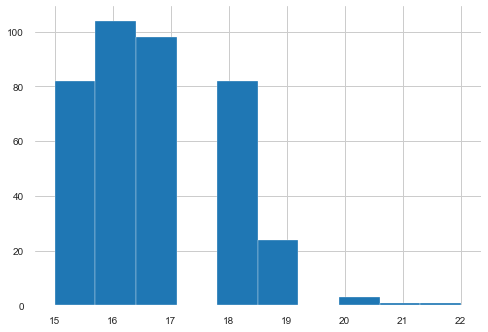

In [48]:
stud['age'].hist()

In [49]:
stud['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Количество учащихся с возрастом 21 и 22 года всего по 1 человеку. Посмотрим на данные с ними:

In [50]:
stud[stud['age']>20]

school sex  age address famsize pstatus medu fedu      mjob      fjob  \
247     GP   M   22       U     GT3       T  3.0  1.0  services  services   
392     MS   M   21       R     GT3       T  1.0  1.0     other     other   

     ... nursery higher internet romantic  famrel  freetime  goout  health  \
247  ...   False  False     True     True     5.0       4.0    5.0     1.0   
392  ...   False   <NA>    False    False     5.0       5.0    3.0     3.0   

     absences  score  
247      16.0   40.0  
392       3.0   35.0  

[2 rows x 29 columns]

Удалим строки где возраст равен 21 и 22 года:

<AxesSubplot:>

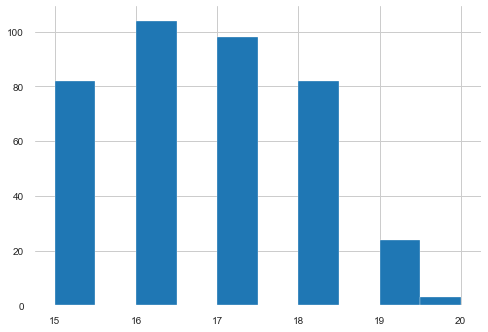

In [51]:
stud = stud[stud['age']<21]
stud['age'].hist()

Рассмотрим распределение признака 'failures':

In [52]:
stud['failures'].value_counts(normalize=True)

0.0    0.789757
1.0    0.132075
2.0    0.043127
3.0    0.035040
Name: failures, dtype: float64

Итого: нулевое количество внеучебных неудач - 79%

    
Рассмотрим распределение признака 'absences':

<AxesSubplot:>

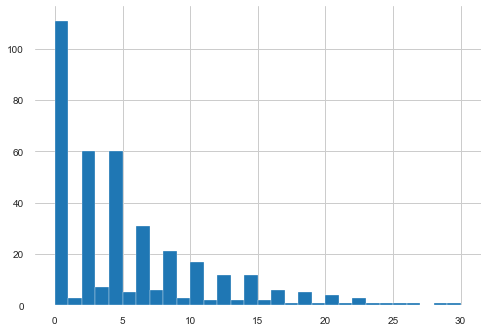

In [53]:
stud['absences'].hist(bins=30)

In [54]:
stud['absences'].value_counts()

0.0     111
4.0      60
2.0      60
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       7
16.0      6
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
1.0       3
9.0       3
13.0      2
11.0      2
15.0      2
17.0      1
25.0      1
26.0      1
23.0      1
28.0      1
21.0      1
30.0      1
19.0      1
24.0      1
Name: absences, dtype: int64

Количество случаев пропущенных занятий снижается от 111 - при нулевых пропусках до 1 - при 30 пропусках. При этом четное количество случаев значительно больше чем нечетное. Есть две версии:
1) Можно предположить, что ученики пропускают сразу несколько занятий и чаще всего четное количество
2) Возможно одно пропущенное занятие - это половина пары. Поэтому чаще пропускают целую пару, а не ее половину


Рассмотрим распределение признака 'score':

<AxesSubplot:>

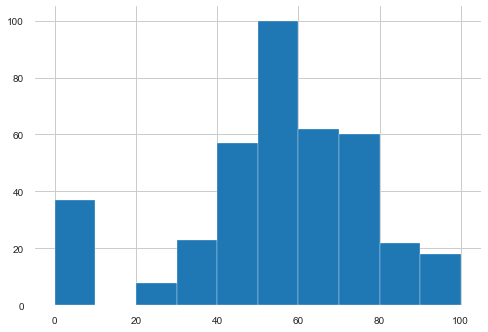

In [55]:
stud['score'].hist()

In [56]:
stud['score'].value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     30
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      8
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Заметно, что нулевой балл по математике - встретился 37 раз. Затем выше него идет балл = 20. Можно сделать вывод, что баллы тех кто сдавал не могут быть ниже 20 баллов, а все что ниже это баллы по каким либо причинам не здававших математику, например не допущен или болен. Можно разделить переменную 'score' на две переменных: 'score1' и 'score2'. В первую занести значения ниже 20 баллов, а во вторую от 20 и выше:

In [57]:
stud['score1'] = stud[stud['score'] < 20]['score']
stud['score2'] = stud[stud['score'] >= 20]['score']

<ipython-input-57-d931ebb8a512>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud['score1'] = stud[stud['score'] < 20]['score']
<ipython-input-57-d931ebb8a512>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud['score2'] = stud[stud['score'] >= 20]['score']


Рассмотрим распределение признака 'score1' и 'score2':

<AxesSubplot:>

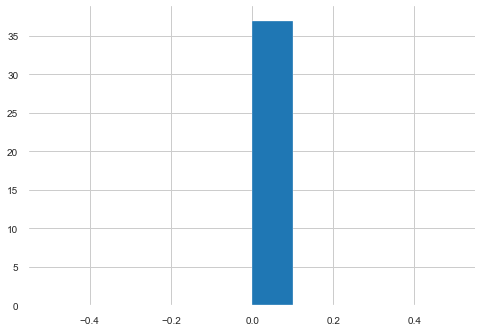

In [58]:
stud['score1'].hist()

<AxesSubplot:>

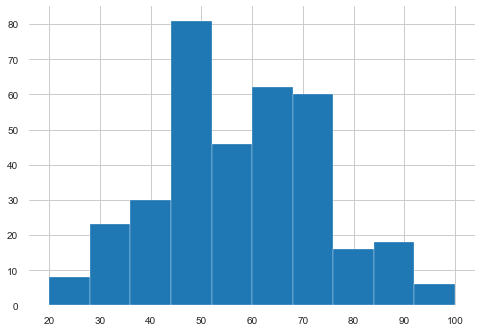

In [59]:
stud['score2'].hist()

# Корреляция данных

In [60]:
stud.corr()

age  failures  absences     score  score1    score2
age       1.000000  0.167526  0.133060 -0.149173     NaN -0.109475
failures  0.167526  1.000000  0.092734 -0.344936     NaN -0.274286
absences  0.133060  0.092734  1.000000  0.070908     NaN -0.220354
score    -0.149173 -0.344936  0.070908  1.000000     NaN  1.000000
score1         NaN       NaN       NaN       NaN     NaN       NaN
score2   -0.109475 -0.274286 -0.220354  1.000000     NaN  1.000000

как видно из таблицы наибольшую корреляцию  с признаком score имеет переменная failures. Также можно оставить в итоговом датасете слабокоррелирующие переменные age и absences


# Анализ номинативных переменных

In [61]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

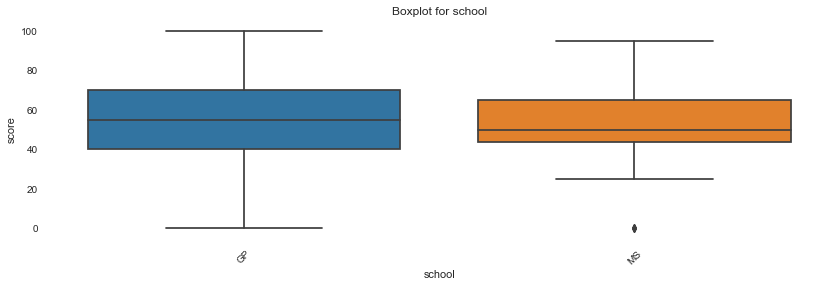

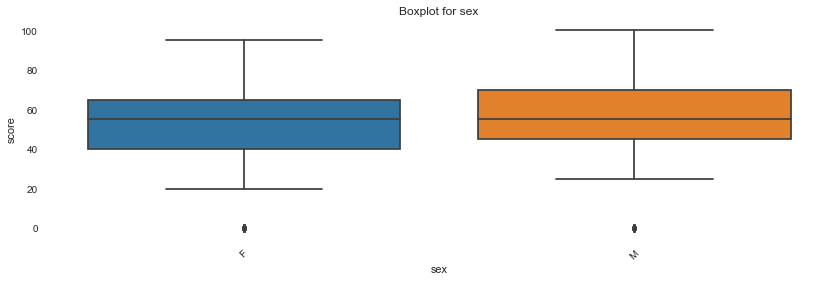

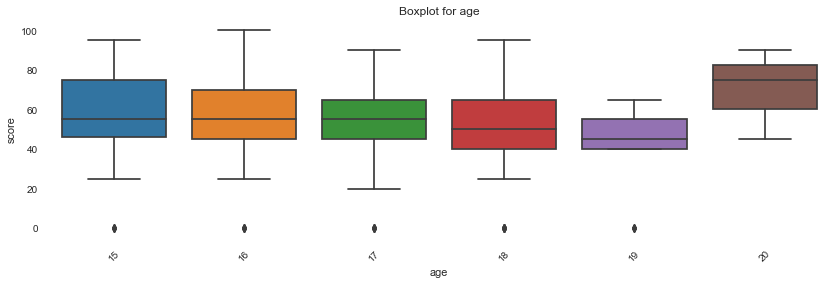

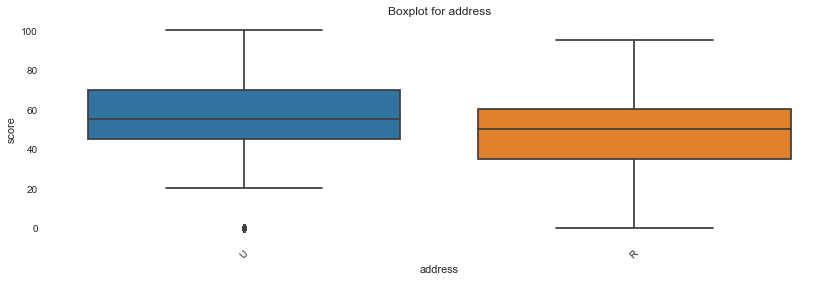

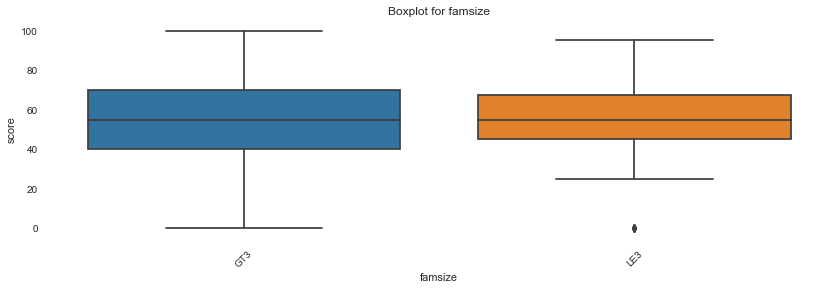

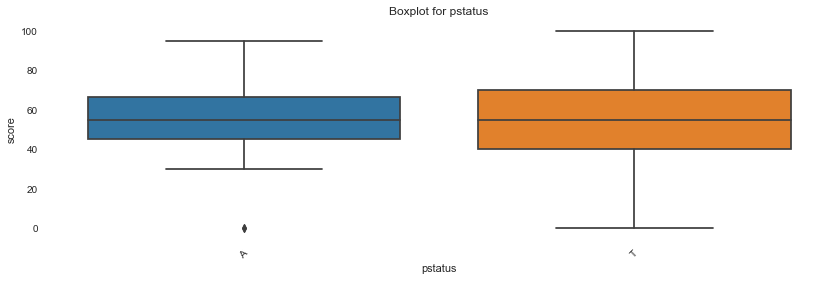

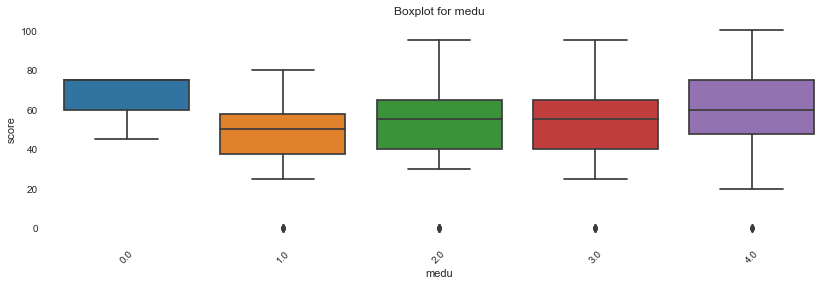

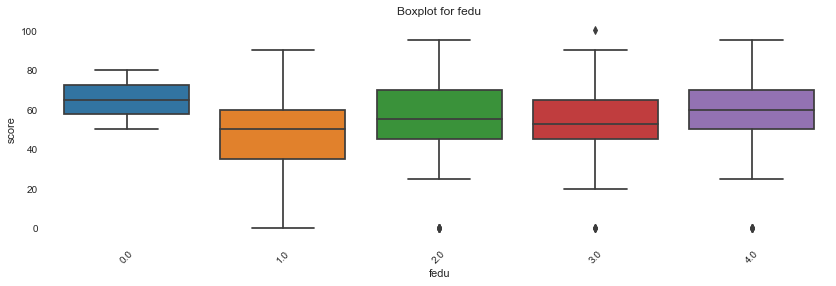

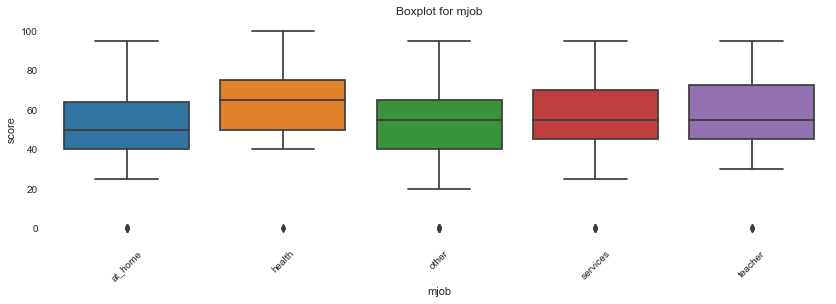

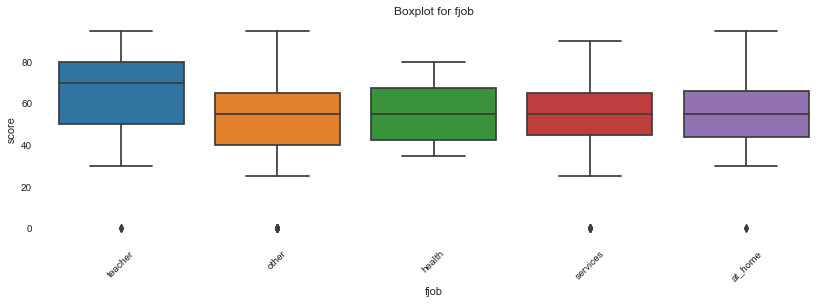

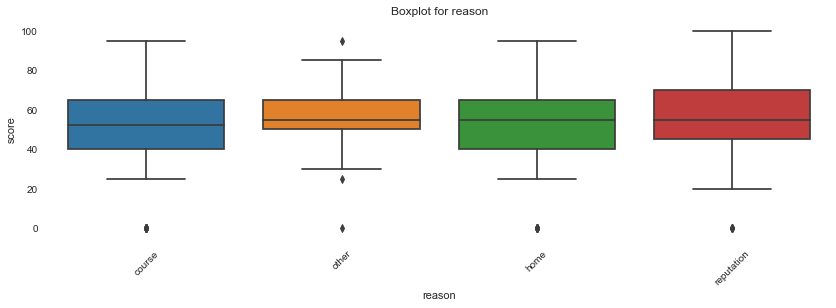

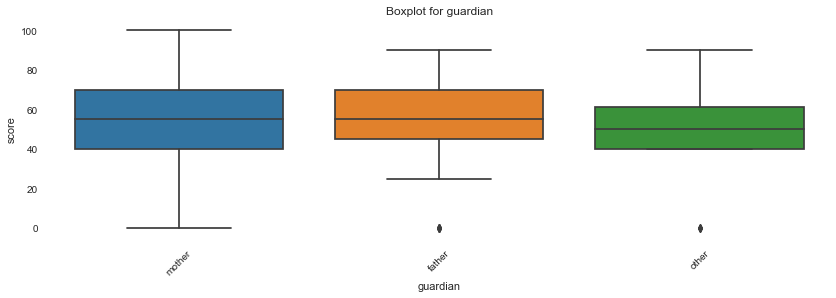

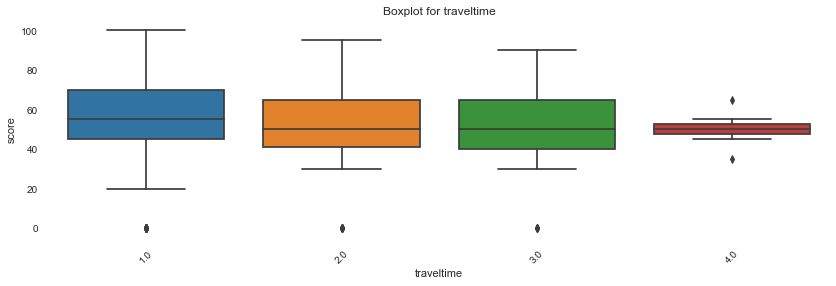

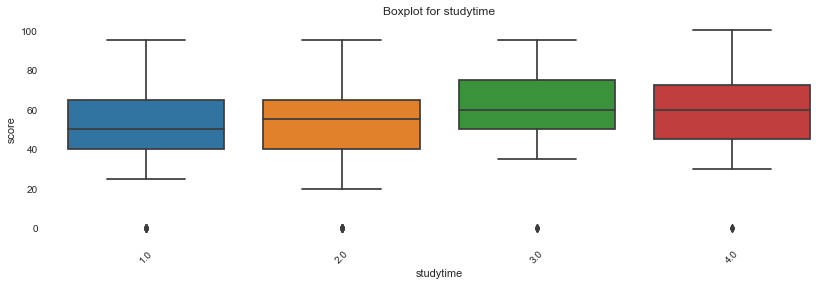

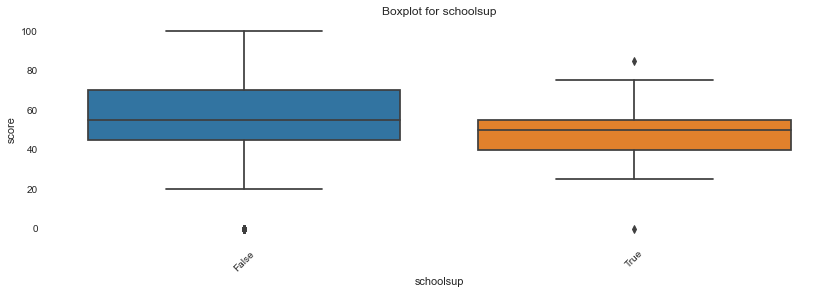

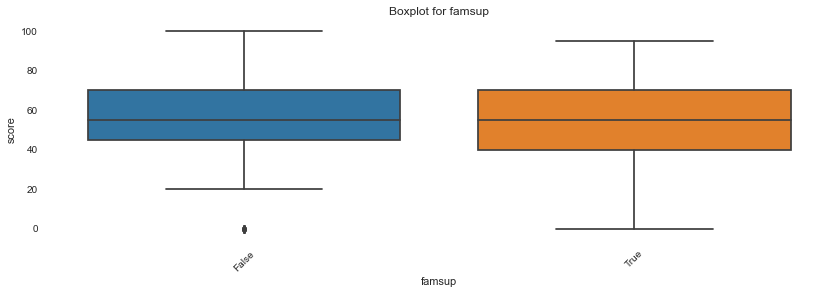

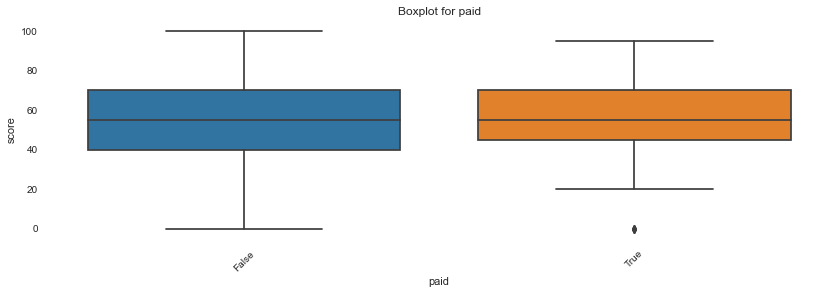

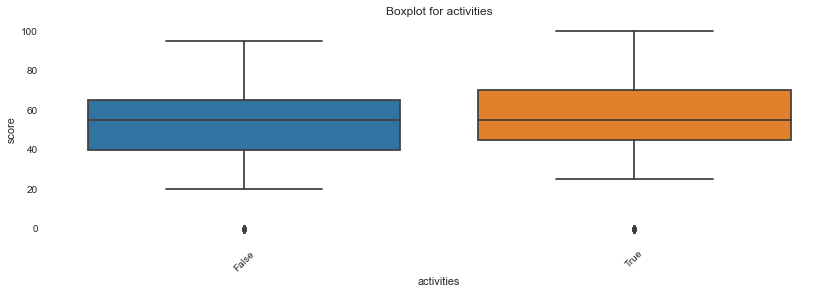

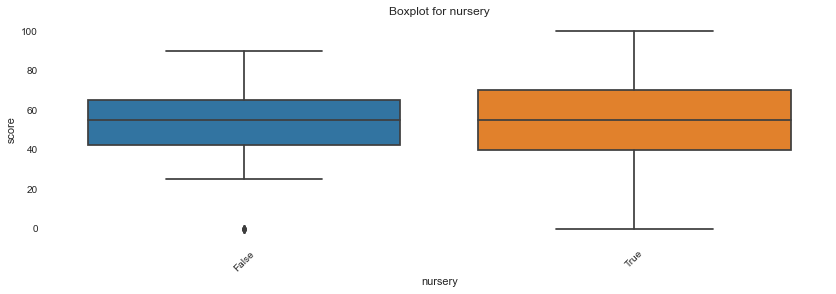

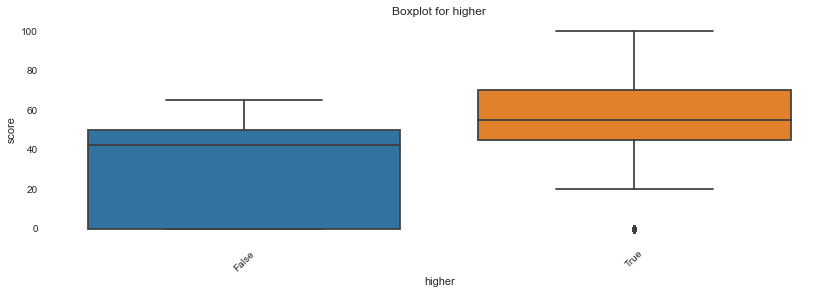

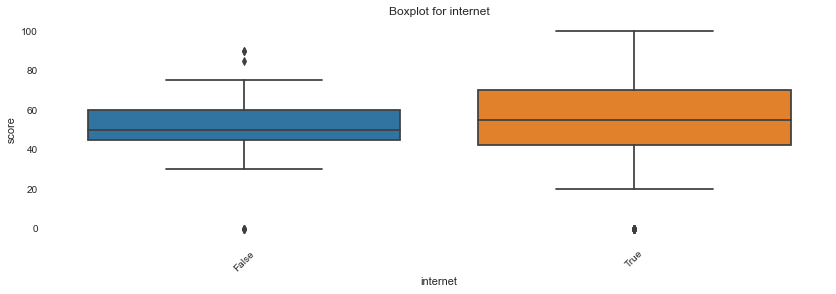

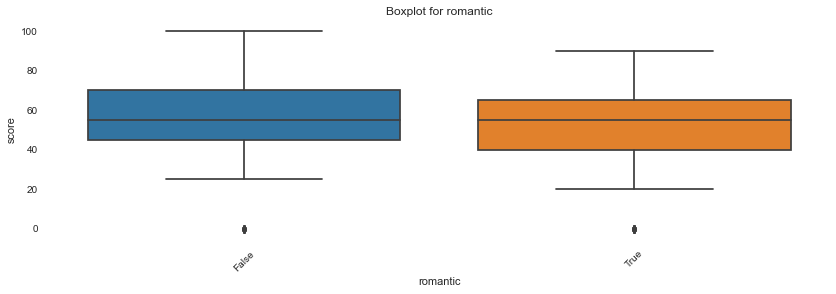

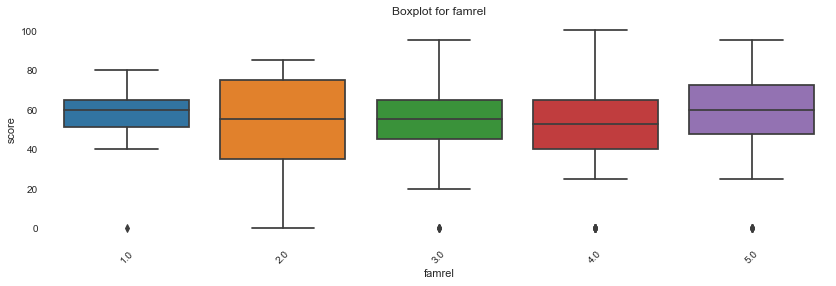

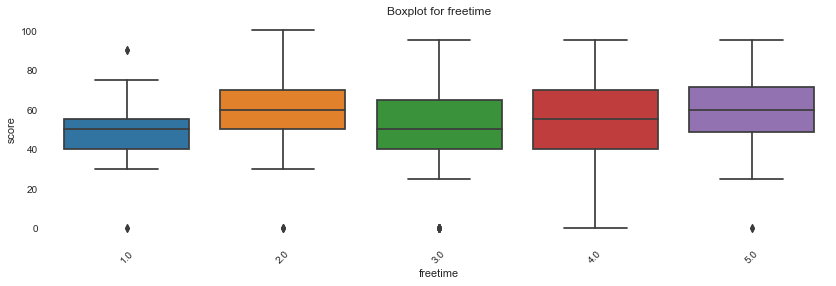

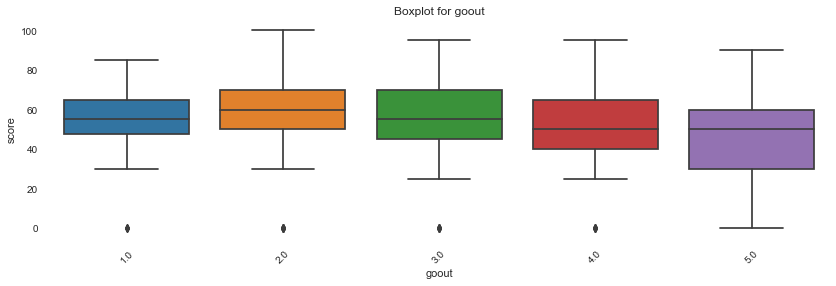

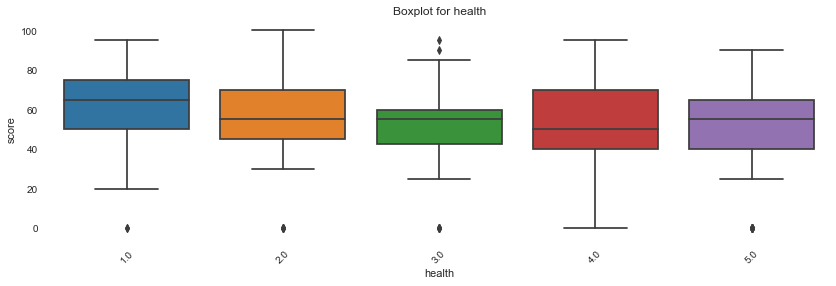

In [62]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 
           'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
            'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

In [63]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.1/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [64]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 
           'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
            'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mjob


# Заполнение пропусков в данных
Найдены статистически значимые различия только для колонки mjob. Причина может быть в пропущенных значениях в других столбцах. Для проверки этой теории заполним отсутствующие значения в столбцах:

In [65]:
def filling_missing(column):
    # Функция принимает на вход название столбца и в зависимости от его типа:
    # заменяет пропущенные значения: 
    # 1) для числовых значений на медиану
    # 2) для категорийных и логических значений на моду
    
    col = stud.loc[:, column]
    if col.dtype == 'object':
        col = col.fillna(col.mode().values[0])
        stud.loc[:, column] = col
    elif col.dtype in ['int64', 'float64']:
        col = col.fillna(col.median())
        stud.loc[:, column] = col
    elif col.dtype == 'boolean':
        col = col.fillna(col.mode().values[0])
        stud.loc[:, column] = col
    return col

In [66]:
for column in stud.columns:
    filling_missing(column)


c:\users\пользователь\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Выбор переменных для модели
Проверим на полностью заполненном датасете:

In [67]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 
           'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
            'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


Гипотеза о влянии отсутствующих значений на статистически значимые отличия оказалась верной. В итоговый датасет должны войти следующие переменные, которые, возможно, оказывают влияние на оценку, это: sex, address, medu, mjob, schoolsup, paid, higher, romantic, goout, failures, absences

In [68]:
stud_for_model = stud.loc[:,['sex', 'address', 'medu', 'mjob', 'schoolsup', 'paid', 'higher', 'romantic', 'goout', 'failures', 'absences', 'score']]
stud_for_model.head()

sex address medu     mjob  schoolsup   paid  higher  romantic goout  \
0   F       U  4.0  at_home       True  False    True     False   4.0   
1   F       U  1.0  at_home      False  False    True     False   3.0   
2   F       U  1.0  at_home       True  False    True     False   2.0   
3   F       U  4.0   health      False   True    True      True   2.0   
4   F       U  3.0    other      False   True    True     False   2.0   

   failures  absences  score  
0       0.0       6.0   30.0  
1       0.0       4.0   30.0  
2       3.0      10.0   50.0  
3       0.0       2.0   75.0  
4       0.0       4.0   50.0

# Промежуточные выводы 
Для модели будут использованы 12 признаков, в том числе и score. Из них: 6 категорийных, 2 числовые и 4 логические

Количество пропущенных значений в них от 0 - в sex до 40 - paid. Все пропуски заполнены следующим образом: для числовых переменных - медианой, для категорийных и логических переменных - модой. 
Количество уникальных значений в категорийных переменных от 2х до 5ти, что не так уж и много и поможет получить более качественные результаты модели

В переменной absences имелось 7 выбросов - значения больше 30. Выбросы заменены на медианные значения

В целом количество выбросов и пропусков значений не должно оказать сильного воздействия на результаты модели


# Выводы

В результате EDA для анализа влияния условий жизни учащихся на их успеваемость по математике были получены следующие выводы:
- в данных имеются отсутствующие значения, которые могут незначительно повлиять на результат работы модели. Наибольшее количество пропущенных данных в переменных: pstatus, fjob, famsup, paid
- выбросы найдены только в столбце absences, что позволяет сделать вывод, что данные достаточно чистые
- отрицательная корреляция failures и score может говорить о том, что на успеваемость по математике может иметь влияние то,что напрямую с учебой не связано
- в дальнейшем, для построения модели рекомендуется использовать следующие переменные sex, address, medu, mjob, schoolsup, paid, higher, romantic, goout, failures, absences
- подведенные выше итоги могут подтвердиться или опровергнуться только после обработки результатов работы модели